In [108]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
# Leer datos separados por una coma usando pandas
data1 = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/SegundoSemestre/Dataset/Salary_Data.csv', delimiter=',')


# Verificar las primeras filas del dataset
print(data1.head())

# Eliminar las primeras columnas no necesarias
data = data1[['Years of Experience', 'Salary']]

# Verificar si hay valores NaN en cualquier columna
print("Valores NaN en dataset:", data.isna().sum())

# Eliminar filas con valores NaN
data_clean = data.dropna()

# Verificar que se hayan eliminado los NaN
print("Valores NaN en dataset limpio:", data_clean.isna().sum())

# Extraer columnas
X = data_clean['Years of Experience'].values
y = data_clean['Salary'].values

# Convertir a arrays de numpy
X = np.array(X)
y = np.array(y)

m = y.size  # m = numero de ejemplos de entrenamiento

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Valores NaN en dataset: Years of Experience    3
Salary                 5
dtype: int64
Valores NaN en dataset limpio: Years of Experience    0
Salary                 0
dtype: int64


In [192]:
data

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
6699,20.0,200000.0
6700,3.0,50000.0
6701,4.0,55000.0
6702,14.0,140000.0


In [193]:
print(X)

[ 5.  3. 15. ...  4. 14.  1.]


In [194]:
print(y)

[ 90000.  65000. 150000. ...  55000. 140000.  35000.]


In [195]:
print(X.size)

6699


In [196]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Salario')
    pyplot.xlabel('Años de Experiencia')

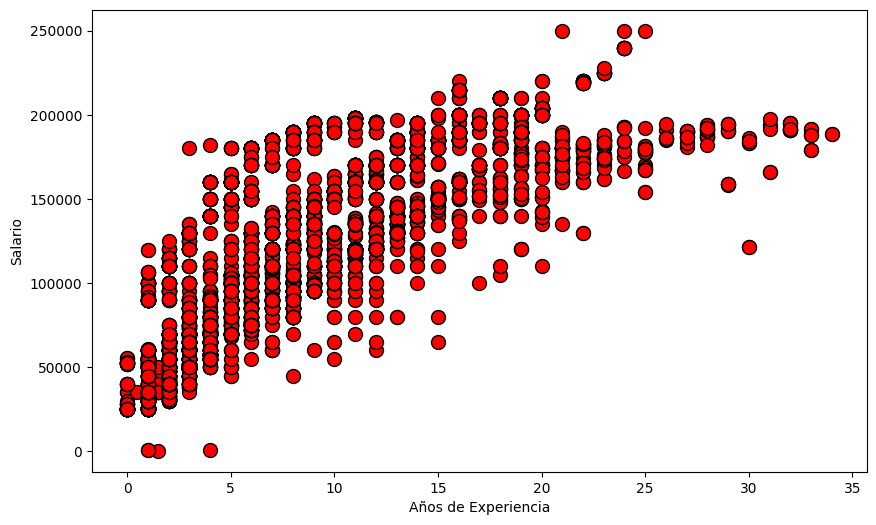

In [197]:
plotData(X, y)

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [198]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [199]:
X

array([[ 1.,  5.],
       [ 1.,  3.],
       [ 1., 15.],
       ...,
       [ 1.,  4.],
       [ 1., 14.],
       [ 1.,  1.]])

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [200]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [201]:
J

8040867943.444917

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [202]:
# Calcular el costo con theta = [0, 0]
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \nCosto calculado = %.2f' % J)

# Pruebas adicionales de la función de costo con theta = [-1, 2]
theta = np.array([-1, 2])
J = computeCost(X, y, theta)
print('Con theta = [-1, 2]\nCosto calculado = %.2f' % J)


Con theta = [0, 0] 
Costo calculado = 8043137037.62
Con theta = [-1, 2]
Costo calculado = 8040867943.44


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [203]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # número de ejemplos de entrenamiento

    theta = theta.copy()  # Hacer una copia de theta para evitar cambios en la matriz original

    J_history = []  # Lista para almacenar el costo en cada iteración

    for i in range(num_iters):
        # Cálculo del gradiente
        gradient = (1 / m) * X.T.dot(np.dot(X, theta) - y)

        # Actualización de theta
        theta = theta - alpha * gradient

        # Guardar el costo J en cada iteración
        J_history.append(computeCost(X, y, theta))

    return theta, J_history


\Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [204]:

# Inicializar theta y ejecutar descenso por gradiente
theta = np.zeros(2)
iterations = 10000
alpha = 0.0001

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))

Theta encontrada por descenso gradiente: 18137.8178, 10236.3067


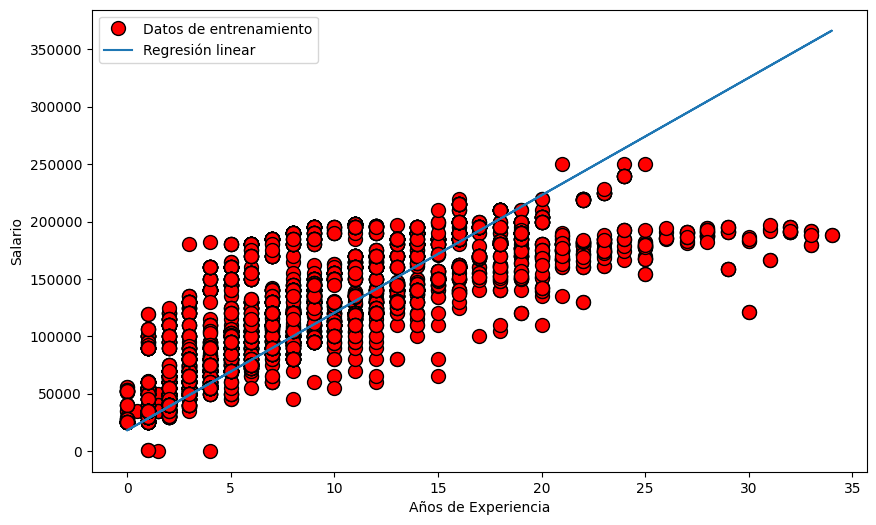

In [205]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [206]:
predict1 = np.dot([1, 3.5], theta)
print('Para una experiencia de 3.5 años, se predice un salario de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 9], theta)
print('Para una experiencia de 9 años, se predice un salario de {:.2f}\n'.format(predict2))


Para una experiencia de 3.5 años, se predice un salario de 53964.89

Para una experiencia de 9 años, se predice un salario de 110264.58



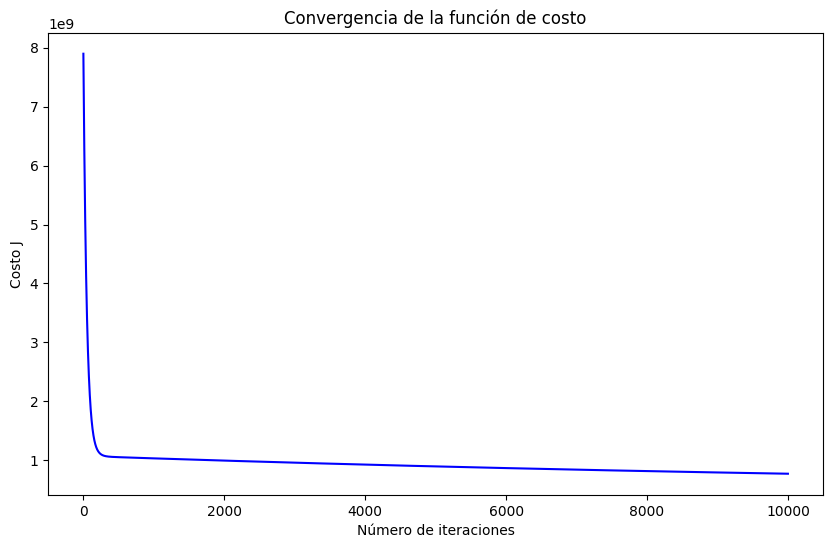

In [207]:
# Graficar la convergencia del costo
plt.plot(range(1, len(J_history) + 1), J_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Convergencia de la función de costo")
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo J")
plt.show()
